In [172]:
import numpy as np
import pandas as pd

In [194]:
# read data from all the csv files
pork = pd.read_csv('xiachufang_pork.csv')
chicken = pd.read_csv('xiachufang_chicken.csv')
beef = pd.read_csv('xiachufang_beef.csv')
lamb = pd.read_csv('xiachufang_lamb.csv')
duck = pd.read_csv('xiachufang_duck.csv')
fish = pd.read_csv('xiachufang_fish.csv')
shrimp = pd.read_csv('xiachufang_shrimp.csv')
egg = pd.read_csv('xiachufang_egg.csv')
tofu = pd.read_csv('xiachufang_tofu.csv')

In [209]:
# initial cleaning of the dataset arranging indices/columns and drop duplicates
all_recipes = pd.concat([pork,chicken,beef,lamb,duck,fish,shrimp,egg,tofu], axis = 0, sort = False)
all_recipes = all_recipes.drop_duplicates()
all_recipes = all_recipes.dropna(axis = 0, how = 'any')
all_recipes = all_recipes.set_index('title')
all_recipes = all_recipes[['ingredients','author','master','num_tried','rating','picture','exclusive']]

In [210]:
all_recipes.sample(10)

,ingredients,author,master,num_tried,rating,picture,exclusive
title,,,,,,,
肉蟹煲的鸡爪鸡翅,"鸡爪,葱姜蒜,蚝油,料酒,淀粉,糖,土豆,鸡翅",FreedomandI,False,124,8.5,True,True
萝卜排骨汤,"萝卜,姜片,葱花,盐,鸡精,胡椒粉,美极鲜酱油,料酒,生粉",臻妈美食厨房,False,711,7.9,False,False
秘制泡椒凤爪,"鸡爪,洋葱,胡萝卜,芹菜,八角,桂皮,豆蔻,草果,花椒,红辣椒,瓶装泡椒,盐,鸡精,白醋,糖,味精",臻妈美食厨房,False,142,7.9,False,False
红烧大肠,"大肠,盐,葱结,姜片,料酒,酱油",子瑜妈妈,True,199,7.6,True,False
鹌鹑蛋烧肉,"五花肉,鹌鹑蛋,姜片,料酒,生抽,冰糖,盐",呤儿,True,177,8.0,False,True
西红柿鸡蛋汤,"西红柿,鸡蛋,香菜,淀粉,食盐,香葱",堂妈小厨,True,1359,8.0,True,False
酸汤肥牛（羽萱妈妈版）,"番茄,黄豆芽,金针菇,蒜,水,盐,葱花,香菜末",糖盐盐,False,157,7.9,True,False
可乐鸡爪,"鸡爪,可乐,蒸鱼豉油,老抽,料酒,葱,姜,蒜,盐",简单,False,227,8.1,True,False
攸县香干,"香干,姜蒜,生抽,豆豉",梅子厨艺,False,388,7.6,True,False


In [272]:
# top 10 recipe
all_recipes.sort_values('num_tried', ascending = False).head(10)

,ingredients,num_ingred,author,master,num_tried,rating,picture,exclusive
title,,,,,,,,
可乐鸡翅,"[coke, salt, alcohol, soy sauce, soy sauce]",5,渍,True,68706,8.2,True,True
根本停不下来的糖醋排骨,"[alcohol, soy sauce, water, vinegar, spice]",5,笑货吃货,False,36799,8.7,True,True
喷香排骨焖饭（爆好吃）,"[pork, carrots, mushroom, scallion, ginger, ga...",10,菡小丫的妈咪,False,24704,8.6,True,False
红烧排骨,"[pork, scallion, ginger, garlic, salt, soy sau...",10,NZmom,True,21236,8.1,True,False
可乐鸡翅,"[chicken, hot peppers, coke, soy sauce]",4,希洛大大大大人,True,20837,8.1,True,True
麻婆豆腐,"[tofu, bean sauce, pork, hot peppers, hot pepp...",7,大花花西瓜瓜,False,20806,7.8,True,False
红烧肉沫茄子,"[茄子, pork, hot peppers, scallion, ginger, garl...",13,梅子厨艺,False,20204,7.9,True,False
糖醋里脊,"[pork, sugar, tomatoes or tomato products, oth...",9,apple爱自己,False,18632,8.0,True,False
葱花鸡蛋饼,"[other chicken products, noodles, scallion, sa...",5,偏离.于墨尔本.,True,18100,7.6,True,False


In [212]:
np.sum(all_recipes.isnull(), axis = 0)

ingredients    0
author         0
master         0
num_tried      0
rating         0
picture        0
exclusive      0
dtype: int64

In [213]:
all_recipes.nunique()

ingredients    3068
author         1611
master            2
num_tried      1225
rating           34
picture           2
exclusive         2
dtype: int64

In [214]:
all_recipes.dtypes

ingredients     object
author          object
master          object
num_tried        int64
rating         float64
picture           bool
exclusive         bool
dtype: object

In [215]:
all_recipes.describe()

,num_tried,rating
count,3105.000000,3105.000000
mean,843.733011,7.927633
std,2142.863959,0.450504
min,100.000000,6.200000
25%,175.000000,7.600000
50%,322.000000,7.900000
75%,711.000000,8.200000
max,68706.000000,9.500000


In [216]:
ingred = []
for i in range(len(all_recipes)):
    ingred += all_recipes['ingredients'][i].split(',')
ingred = set(ingred)
len(ingred)

909

In [217]:
# There are 928 ingredients and this needs to be organized since people sometimes refer to the same thing with 
# different names, so we write the following function to normalize it
def normalize_ingredients(list_):
    '''
    Input: list of ingredients in Chinese
    Output: list of ingredients, most in English and some in Chinese which avoids confusion caused by namings    
    '''
    for n, i in enumerate(list_):
        if i in {'三奈','仔姜','姜','姜丝','姜块','姜末','姜汁','姜泥','姜片','姜碎', '姜粉', \
                 '姜花','姜茸', '姜蓉','姜黄粉', '嫩姜','山奈','干姜','鲜姜', '泡姜','老姜','良姜','生姜','沙姜'}:
            list_[n] = 'ginger'
        elif i in {'中筋面粉', '中筋粉', '中粉', '低筋粉', '低筋面粉', '低粉','全麦粉','小麦粉','高筋面粉','高粉'}:
            list_[n] = 'flour'
        elif i in {'乌鸡', '土鸡', '小鸡腿','鸡脯肉','鸡腿','鸡腿肉','鸡胸','鸡胸肉','鸡胸脯肉','鸡翅','鸡翅中','鸡翅根',\
                   '鸡翅膀','鸡肉','鸡','鸡中翅','鸡块','老母鸡','童子鸡','翅中','琵琶腿'}:
            list_[n] = 'chicken'
        elif '鸡' in i or i in {'凤爪'}:
            list_[n] = 'other chicken products'
        elif i in {'五花肉','午餐肉', '叉烧肉','咸肉', '培根', '小排','排骨','里脊','里脊肉','肉馅','肉糜','肉','肉丝',\
                   '肉末','瘦猪肉','瘦肉','猪里脊','猪里脊肉','猪肋排','猪肉末','猪肉','猪绞肉','猪瘦肉','猪扒','猪排',\
                   '猪排骨','猪小排','猪五花','猪五花肉','腊肉','肋排','肉沫','香肠'}:
            list_[n] = 'pork'
        elif i in {'腊肠','肥肠','肉皮','肉蔻','肉蔻粉'}:
            list_[n] = 'other pork products'
        elif '猪' in i:
            list_[n] = 'other pork products'
        elif i in {'肥牛', '瘦牛肉','牛肉','牛肉末','牛腩','牛腩肉','牛腱','牛腱肉','牛里脊','牛里脊肉'}:
            list_[n] = 'beef'
        elif i in {'羊排','羊肉','羊肉汤','羊肉片','羊脊骨','羊腿'}:
            list_[n] = 'lamb'
        elif i in {'姜蒜','姜蒜片'}:
            list_[n] = 'ginger'
            list_.append('garlic')
        elif i in {'葱蒜','葱蒜末'}:
            list_[n] = 'scallion'
            list_.append('garlic')
        elif i == {'姜葱','葱姜','葱姜丝','葱姜末'}:
            list_[n] = 'ginger'
            list_.append('scallion')
        elif i in {'姜葱蒜','葱姜蒜','葱姜蒜末'}:
            list_[n] = 'ginger'
            list_.extend(['scallion', 'garlic'])        
        elif '葱' in i:
            list_[n] = 'scallion'
        elif i in {'全蛋', '土鸡蛋', '鹌鹑蛋','鸡蛋','鸡蛋清','鸡蛋黄','蛋黄','蛋黄液','蛋','蛋液','蛋清','蛋白'}:
            list_[n] = 'egg'
        elif i in {'千张','豆泡','豆渣','豆干', '豆腐干','豆腐皮','油豆皮','油豆腐','腐竹','香干'}:
            list_[n] = 'tofu product'
        elif '腐乳' in i:
            list_[n] = 'tofu product'
        elif '豆腐' in i:
            list_[n] = 'tofu'
        elif '水' in i or '凉白开' in i or '冰' in i:
            list_[n] = 'water'
        elif '菇' in i or '蘑' in i:
            list_[n] = 'mushroom'
        elif '糖' in i:
            list_[n] = 'sugar'
        elif '黑胡椒' in i or '黑椒碎' in i:
            list_[n] = 'black pepper'
        elif '白胡椒' in i:
            list_[n] = 'white pepper'
        elif '椒' in i:
            list_[n] = 'hot peppers'
        elif '龙虾' in i:
            list_[n] = 'lobster'
        elif '虾' in i:
            list_[n] = 'shrimp'
        elif i == '南乳':
            list_[n] = '南乳汁'
        elif '可乐' in i :
            list_[n] = 'coke'
        elif i in {'味啉', '味淋', '味醂', '味霖'}:
            list_[n] = 'mirin'
        elif '咖喱' in i or '咖哩' in i:
            list_[n] = 'curry'
        elif i in {'咸蛋', '咸蛋黄', '咸鸭蛋','松花蛋','笨鸡蛋','皮蛋'}:
            list_[n] = 'other eggs'
        elif i in {'土豆淀粉', '地瓜粉','干淀粉','干生粉','木薯淀粉','木薯粉', '淀粉','芡实','芡粉',\
                   '生粉','生粉水','玉米淀粉','玉米粉','湿淀粉','澄粉','泡打粉','水淀粉','水芡粉'}:
            list_[n] = 'starch'
        elif i in {'大土豆', '土豆', '地瓜','小土豆'} or '马铃' in i or '薯' in i:
            list_[n] = 'potatoes'
        elif i in {'大肠'}:
            list_[n] = 'other pork product'
        elif i in {'奶油', '奶油奶酪','奶油霜','鲜奶油'}:
            list_[n] = 'cream'
        elif '蒜' in i:
            list_[n] = 'garlic'
        elif i in {'孜然','孜然粉','孜然粒', '小茴香','丁香','当归','五香粉','党参','八瓣','八角','十三香','香料','迷迭香',\
                   '桂枝','桂皮','百里香','虫草花','茯苓','茴香','月桂叶','甘草','陈皮','牛至','肉桂','黄芪'}:
            list_[n] = 'spice'
        elif i in {'坚果','木耳','杏仁','杏仁露','杞子','松子','松茸','板栗','枸杞','枸杞子','核桃','核桃仁',\
                   '燕麦','燕麦片', '腰果','栗子','开心果','瓜子仁','百合','白果','银耳','薏仁'}:
            list_[n] = 'dry products'
        elif i in {'香菜','香菜末','薄荷叶','香草','香叶'}:
            list_[n] = 'culinary herb'
        elif '肉桂' in i:
            list_[n] = 'spice'
        elif '罗勒' in i:
            list_[n] = 'culinary herb'
        elif  i == '木耳':
            list_[n] = 'dry products'
        elif i in {'话梅','蜜枣','无花果','大枣','桂圆干','桂圆肉','枣','蔓越莓','葡萄干','蓝莓','红枣'}:
            list_[n] = 'dried fruits'
        elif i in {'山楂','山楂干','干山楂'}:
            list_[n] = 'hawthorn'
        elif i in {'包菜','卷心菜','大白菜','小白菜','圆白菜','娃娃菜','高丽菜'}:
            list_[n] = 'cabbage'
        elif '面' in i:
            list_[n] = 'noodles'
        elif '酒' in i:
            list_[n] = 'alcohol'
        elif '酱油' in i or '生抽' in i or '老抽' in i or '味极鲜' in i:
            list_[n] = 'soy sauce'
        elif i in {'鱼子','鱼籽','鱼露'}:
            list_[n] = 'other fish product'
        elif i in {'蒸鱼豉油'}:
            list_[n] = 'special sauce for cooking seafood'
        elif '鱼' in i:
            list_[n] = 'fish'
        elif i in {'鸭子', '鸭肉', '鸭翅','鸭腿','老鸭'}:
            list_[n] = 'duck'
        elif '鸭' in i:
            list_[n] = 'other duck products'
        elif '醋' in i:
            list_[n] = 'vinegar'
        elif '油' in i:
            list_[n] = 'oil'
        elif '面包' in i:
            list_[n] = 'bread'
        elif i in {'粉丝','粉条','粉皮','粘米粉','河粉'}:
            list_[n] = 'other noodles'
        elif '饭' in i:
            list_[n] = 'rice'
        elif '米' in i:
            list_[n] = 'rice'
        elif '牛' in i:
            list_[n] = 'other beef products'
        elif '羊' in i:
            list_[n] = 'other lamb products'
        elif '笋' in i:
            list_[n] = 'bamboo shoots'
        elif '味增' in i or '味噌' in i:
            list_[n] = 'miso'
        elif '番茄' in i or '西红柿' in i or '圣女果' in i or '蕃茄' in i:
            list_[n] = 'tomatoes or tomato products'
        elif '螺' in i:
            list_[n] = 'shell'
        elif '玉米' in i:
            list_[n] = 'corn'
        elif '火腿' in i:
            list_[n] = 'pork'
        elif '盐' in i or i == '鹽':
            list_[n] = 'salt'
        elif '木耳' in i:
            list_[n] = '木耳'
        elif '奶' in i or i == '炼乳':
            list_[n] = 'milk related products'
        elif '豆瓣' in i:
            list_[n] = 'bean sauce'
        elif '蟹' in i:
            list_[n] = 'crabs'
        elif '玉米' in i:
            list_[n] = 'corn'
        elif '酱' in i or i in {'调味料','调料','红曲粉','红烧汁','奥尔良腌料','嫩肉粉','抹茶粉','排骨汤','浓汤宝','清汤',\
                               '火锅底料','老干妈','高汤','醪糟','大料'}:
            list_[n] = 'other special cooking sauce'
        elif '味精' in i or '鸡精' in i:
            list_[n] = 'MSG'
        elif '豆芽' in i:
            list_[n] = 'bean sprouts'
        elif '芝士' in i:
            list_[n] = 'cheese'
        elif '胡萝卜' in i:
            list_[n] = 'carrots'
        elif i in {'可可粉'} or '巧克力' in i:
            list_[n] = 'chocolate'
        elif '黄瓜' in i:
            list_[n] = 'cucumber'
        elif '年糕' in i:
            list_[n] = 'ricecake'
        elif i in {'料洒','花雕'}:
            list_[n] = 'alcohol'
        elif i in {'生菜叶'}:
            list_[n] = '生菜'
        elif i in {'白菜叶'}:
            list_[n] = '白菜'
        elif '花生' in i:
            list_[n] = 'peanuts'
        elif '芝麻' in i:
            list_[n] = 'sesame'
        elif '苏打' in i or '碱' in i:
            list_[n] = 'soda'
        elif '柠' in i:
            list_[n] = 'lemon or lime'
        elif '韭' in i:
            list_[n] = '韭菜'
        elif '芹' in i:
            list_[n] = 'celery'
        elif '酵母' in i:
            list_[n] = 'yeast'
        elif i in {'咸菜', '梅干菜','酸菜','酸豆角','酸豇豆','辣白菜','腌菜','泡菜','榄菜','榨菜', '橄榄菜'}:
            list_[n] = '腌菜'
        elif '豆' in i:
            list_[n] = 'beans'
        elif i in {'莲子','莲藕','藕'}:
            list_[n] = 'lotus'
        elif '甘蓝' in i:
            list_[n] = '甘蓝'
        elif '萝卜' in i:
            list_[n] = '萝卜'
        elif '南瓜' in i:
            list_[n] = '南瓜'
        elif '干贝' in i:
            list_[n] = '干贝'
        elif i in {'花椰菜'}:
            list_[n] = '花菜'
        elif i in {'西蓝花'}:
            list_[n] = '西兰花'
        elif i in {'马兰'}:
            list_[n] = '马兰头'
        elif i in {'芋头','芋艿'}:
            list_[n] = '芋艿'
    return list_

In [220]:
# calling the above written method to normalize ingredients
all_recipes['ingredients'] = list(map(lambda s: normalize_ingredients(s.split(',')), all_recipes['ingredients']))

In [242]:
# with the function call, we reduce the number of ingredients to 159
ingred_list = []
for i in range(len(all_recipes['ingredients'])):
    ingred_list.extend(all_recipes['ingredients'][i])
ingred_list = set(ingred_list)
len(ingred_list)

159

In [238]:
# calculate how many ingredients are needed for each recipe
all_recipes['num_ingred'] = all_recipes['ingredients'].apply(lambda list_: len(list_))
all_recipes = all_recipes[['ingredients','num_ingred','author','master','num_tried','rating','picture','exclusive']]

In [239]:
all_recipes.sample(10)

,ingredients,num_ingred,author,master,num_tried,rating,picture,exclusive
title,,,,,,,,
清蒸鸡肉,"[chicken, ginger, soy sauce, starch, alcohol, ...",6,宝宝D猪猪,False,148,7.9,True,True
虾仁炒鸡蛋青椒,"[other chicken products, shrimp, hot peppers, ...",7,小花牛,False,137,7.7,False,False
虾仁厚蛋烧,"[other chicken products, shrimp, other beef pr...",4,月亮晶晶,True,238,7.6,False,False
红烧胡萝卜羊肉,"[carrots, culinary herb, hot peppers, ginger, ...",11,蝴蝶薇安,False,130,7.7,False,True
皮蛋粥,"[other eggs, scallion, rice, rice, water, salt...",7,呤儿,True,305,7.8,False,True
豆豉蒸排骨,"[pork, beans, garlic, ginger, sugar, oil, pota...",11,宅与路上,True,2504,7.9,True,False
鸡肉粥,"[chicken, rice, ginger, scallion, soy sauce, a...",6,王潔瑩426,False,436,7.4,True,False
青椒素鸡,"[other chicken products, soy sauce]",2,笑萧笑萧,False,128,6.7,False,False
丝瓜炒虾仁,"[丝瓜, shrimp, ginger, scallion, egg, salt, alco...",10,杨猫,False,205,7.9,False,False


### Study of the relationships between num_tried, rating, picture and exclusive
    1. What is the relationship between num_tried and rating?
    2. What is the relationship between exclusive and num_tried/rating?
    3. What is the relationship between picture and num_tried/rating?
    

In [158]:
%matplotlib inline

In [159]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

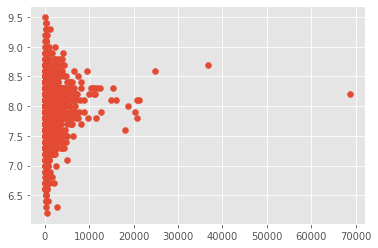

In [160]:
plt.scatter(all_recipes['num_tried'], all_recipes['rating'])

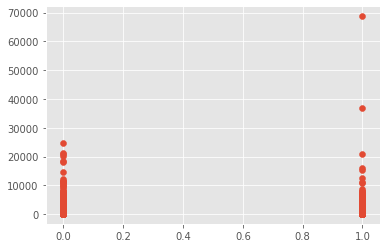

In [161]:
plt.scatter(all_recipes['exclusive'], all_recipes['num_tried'])

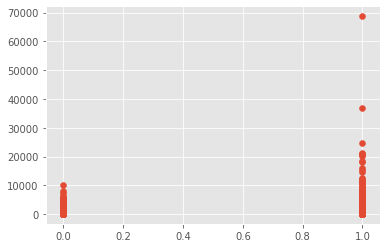

In [162]:
plt.scatter(all_recipes['picture'], all_recipes['num_tried'])

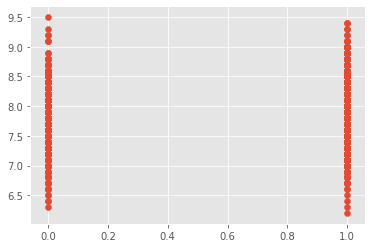

In [163]:
plt.scatter(all_recipes['picture'], all_recipes['rating'])

(array([  9.,  42.,  92., 432., 710., 883., 693., 189.,  45.,  10.]),
 array([6.2 , 6.53, 6.86, 7.19, 7.52, 7.85, 8.18, 8.51, 8.84, 9.17, 9.5 ]),
 <a list of 10 Patch objects>)

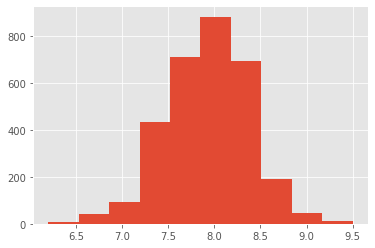

In [164]:
plt.hist(all_recipes['rating'])

## Study of Different Groups Using Groupby
#### Groupby Study Master Cooks
In this part, we analyze the data within two groups. (master cook group and others)

In [243]:
# master chefs
authors = all_recipes[['author', 'master']]
authors = authors.drop_duplicates()
master_ratio = sum(authors['master'])/len(authors)
print('The percentage of master cooks is %.2f'%master_ratio + '.')

The percentage of master cooks is 0.18.


In [244]:
master_recipe = sum(all_recipes['master'])/len(all_recipes)
print('The percentage of recipes prepared by master cooks is %.2f'%master_recipe + '.')

The percentage of recipes prepared by master cooks is 0.37.


In [245]:
ifMaster = all_recipes.groupby(['master'])
colFun = {'num_tried':['count','mean','min','max'],
          'rating':['count','min','max','mean','std'],
          'num_ingred':['count','min', 'max', 'mean', 'std']}
ifMaster.agg(colFun)

num_tried                         rating                                \
           count        mean  min    max  count  min  max      mean       std   
master                                                                          
False       1943  777.420998  100  36799   1943  6.2  9.4  7.858724  0.430810   
True        1162  954.614458  100  68706   1162  6.3  9.5  8.042857  0.459267   

       num_ingred                              
            count min max      mean       std  
master                                         
False        1943   1  23  7.199691  3.463694  
True         1162   1  26  7.499139  3.498554

By comparison, more people tried the recipes created by master cooks. The ratings are also higher for the recipes created by master cooks though not much different and this is the same for number of ingredients.

In [246]:
ifMaster.agg(['count', 'mean'])[['exclusive', 'picture']]

exclusive           picture          
           count      mean   count      mean
master                                      
False       1943  0.210499    1943  0.659290
True        1162  0.465577    1162  0.756454

By comparison, the recipes created by master cooks has higher chance to be exclusive. Also, more recipes that are created by master cooks have picture descriptions.

#### Groupby Study Exclusive
In this part, we analyze the recipes that are divided with respect to whether the recipe is exclusive to the website.

In [250]:
ifExclusive = all_recipes.groupby(['exclusive'])

In [251]:
colFun = {'num_tried':['count','mean','min','max'],
          'rating':['count','min','max','mean','std'],
          'num_ingred':['count','min', 'max', 'mean', 'std']}
ifExclusive.agg(colFun)

num_tried                         rating                      \
              count        mean  min    max  count  min  max      mean   
exclusive                                                                
False          2155  782.393039  100  24704   2155  6.2  9.5  7.889327   
True            950  982.877895  100  68706    950  6.5  9.4  8.014526   

                    num_ingred                              
                std      count min max      mean       std  
exclusive                                                   
False      0.446421       2155   1  26  7.204176  3.411853  
True       0.447872        950   1  23  7.555789  3.617447

More users tried the exclusive recipes and the ratings for exclusive recipes is slightly higher. The number of ingredients used in exclusive recipes is more or less the same when compared to non-exclusive ones.

In [259]:
ifExclusive.agg(['count', 'mean'])['picture']

,count,mean
exclusive,,
False,2155,0.661717
True,950,0.772632


Exclusive menus tend to have more pictures in the description of the recipes.

#### Groupby Study Picture

In [255]:
ifPicture = all_recipes.groupby(['picture'])

In [256]:
colFun = {'num_tried':['count','mean','min','max'],
          'rating':['count','min','max','mean','std'],
          'num_ingred':['count','min', 'max', 'mean', 'std']}
ifPicture.agg(colFun)

num_tried                         rating                      \
            count        mean  min    max  count  min  max      mean   
picture                                                                
False         945  604.184127  100   9976    945  6.3  9.5  7.814286   
True         2160  948.535648  100  68706   2160  6.2  9.4  7.977222   

                  num_ingred                              
              std      count min max      mean       std  
picture                                                   
False    0.446452        945   1  19  6.944974  3.128792  
True     0.443344       2160   1  26  7.472222  3.610900

More people tried the recipe with pictures. The ratings are somewhat similar.

In [260]:
ifPicture.agg(['count', 'mean'])['exclusive']

,count,mean
picture,,
False,945,0.228571
True,2160,0.339815


Recipes with pictures are more likely to be exclusive.

### Master, Exclusive & Picture (mep)

In [277]:
mep_group = all_recipes.groupby(['master', 'exclusive', 'picture'])
mep_group.size()

master  exclusive  picture
False   False      False      592
                   True       942
        True       False       70
                   True       339
True    False      False      137
                   True       484
        True       False      146
                   True       395
dtype: int64

In [278]:
colFun = {'num_tried':['count','mean','min','max'],
          'rating':['count','min','max','mean','std'],
          'num_ingred':['count','min', 'max', 'mean', 'std']}
mep_group.agg(colFun)

num_tried                          rating            \
                             count         mean  min    max  count  min  max   
master exclusive picture                                                       
False  False     False         592   536.496622  100   8037    592  6.4  9.1   
                 True          942   868.809979  100  24704    942  6.2  9.3   
       True      False          70   622.328571  115   4706     70  6.6  8.6   
                 True          339   976.227139  101  36799    339  6.9  9.4   
True   False     False         137   631.948905  101   9976    137  6.3  9.5   
                 True          484   957.551653  100  21236    484  6.3  9.0   
       True      False         146   843.890411  101   7456    146  6.5  9.1   
                 True          395  1103.853165  100  68706    395  6.5  9.4   

                                             num_ingred                    \
                              mean       std      count min max      mean   
master exclusive picture                                                    
False  False     False    7.793750  0.431475        592   1  19  6.935811   
                 True     7.859660  0.431574        942   1  23  7.112527   
       True      False    7.817143  0.355484         70   2  16  7.657143   
                 True     7.978171  0.417652        339   1  23  7.808260   
True   False     False    7.867153  0.534420        137   1  15  6.788321   
                 True     8.070248  0.414518        484   1  26  7.828512   
       True      False    7.846575  0.453213        146   1  16  6.787671   
                 True     8.142785  0.448084        395   1  19  7.605063   

                                    
                               std  
master exclusive picture            
False  False     False    3.228878  
                 True     3.491613  
       True      False    3.292000  
                 True     3.740288  
True   False     False    2.891241  
                 True     3.536490  
       True      False    2.819168  
                 True     3.797003

#### Groupby Study Authors
In this part, we try to study questions related to groups divided according to authors.

In [261]:
authorGroup = all_recipes.groupby(['author'])

In [332]:
author_size = authorGroup.size().sort_values(ascending = False).to_frame()
author_size.columns = ['num_recipes']
author_size.head()

,num_recipes
author,
冇伱灬冇我,47
yanyanfoodtube,38
玉池桃红,38
懒饭App,37
日食记,32


In [333]:
# summary data of the most hardworking author (produces the most recipes)
all_recipes[all_recipes.author == '冇伱灬冇我'].describe()

,num_ingred,num_tried,rating
count,47.000000,47.000000,47.000000
mean,11.255319,1291.468085,8.385106
std,2.988879,2113.563741,0.309262
min,3.000000,110.000000,7.400000
25%,9.000000,254.000000,8.200000
50%,12.000000,407.000000,8.400000
75%,13.000000,1669.000000,8.600000
max,17.000000,11093.000000,9.100000


In [341]:
def productive_list(number_recipes, df):
    '''
    Input: number_recipes integer number of recipes made by the author
            df: dataframe
    Output: shortened dataframes containing only productive authors
    '''
    author_list = author_size[author_size.num_recipes >= number_recipes].index.tolist()
    ifProductive = []
    for _ in range(len(all_recipes)):
        ifProductive.append(all_recipes.author[_] in author_list)
    return df[ifProductive]

In [346]:
# select the most productive author lists (with recipes greater than 10)
prod_list = productive_list(10, all_recipes)

In [359]:
prod_author_list = prod_list[['author', 'master']].drop_duplicates()
prod_author_list.master.sum()

28

In [374]:
def mastercook_ratio(low, high):
    '''
    Input: low lower bound of number of recipes made by the author
            high upper bound of number of recipes made by the author
    Return: Tuple describing master cook ratios
    '''
    list_ = []
    if low < 1 or high > 47:
        raise ValueError('enter some number between 1 and 47')
    for i in range(low, high + 1):
        prod_list = productive_list(i, all_recipes)
        prod_author_list = prod_list[['author', 'master']].drop_duplicates()
        list_.append((i,(prod_author_list.master.sum()/len(prod_author_list))))
    return list_

In [376]:
a = mastercook_ratio(1,47)
a

[(1, 0.18063314711359404),
 (2, 0.45251396648044695),
 (3, 0.5165876777251185),
 (4, 0.564625850340136),
 (5, 0.5446428571428571),
 (6, 0.5476190476190477),
 (7, 0.5441176470588235),
 (8, 0.5344827586206896),
 (9, 0.5454545454545454),
 (10, 0.5833333333333334),
 (11, 0.6944444444444444),
 (12, 0.696969696969697),
 (13, 0.7142857142857143),
 (14, 0.6923076923076923),
 (15, 0.6956521739130435),
 (16, 0.7272727272727273),
 (17, 0.7368421052631579),
 (18, 0.875),
 (19, 0.8666666666666667),
 (20, 0.8461538461538461),
 (21, 0.8333333333333334),
 (22, 0.9090909090909091),
 (23, 0.9090909090909091),
 (24, 0.8888888888888888),
 (25, 0.875),
 (26, 0.8571428571428571),
 (27, 0.8571428571428571),
 (28, 1.0),
 (29, 1.0),
 (30, 1.0),
 (31, 1.0),
 (32, 1.0),
 (33, 1.0),
 (34, 1.0),
 (35, 1.0),
 (36, 1.0),
 (37, 1.0),
 (38, 1.0),
 (39, 1.0),
 (40, 1.0),
 (41, 1.0),
 (42, 1.0),
 (43, 1.0),
 (44, 1.0),
 (45, 1.0),
 (46, 1.0),
 (47, 1.0)]

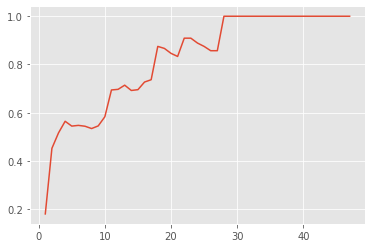

In [391]:
a_list = list(zip(*a))
plt.plot(a_list[0], a_list[1])

#### Groupby Study Number of Ingredients

In [ ]:
ingre_group